In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!pip install gtts
!pip install Streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


In [6]:
!kaggle datasets download -d vishalmane109/indian-currency-note-images-dataset-2020

Dataset URL: https://www.kaggle.com/datasets/vishalmane109/indian-currency-note-images-dataset-2020
License(s): CC0-1.0
100% 2.30G/2.31G [00:10<00:00, 267MB/s]
100% 2.31G/2.31G [00:10<00:00, 232MB/s]


In [7]:
import zipfile
with zipfile.ZipFile('/content/indian-currency-note-images-dataset-2020.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/indian-currency-note-images-dataset-2020')

In [8]:
!kaggle datasets download -d crawford/resnet50

Dataset URL: https://www.kaggle.com/datasets/crawford/resnet50
License(s): CC0-1.0
 89% 155M/174M [00:00<00:00, 218MB/s]
100% 174M/174M [00:00<00:00, 202MB/s]


In [9]:
import zipfile
with zipfile.ZipFile('/content/resnet50.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/resnet50')

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/indian-currency-note-images-dataset-2020'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/100/100_val_39.jpg
/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/100/100_val_28.jpg
/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/100/100_val_0.jpg
/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/100/100_val_7.jpg
/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/100/100_val_19.jpg
/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/100/100_val_8.jpg
/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/100/100_val_42.jpg
/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/100/100_val_35.jpg
/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/100/100_val_16.jpg
/content/indian-currency-note-images-dat

In [11]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
# from keras.utils import load_img, img_to_array

In [12]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=30,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    "/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/training",
    target_size=(256, 256),  # Updated size
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation",
    target_size=(256, 256),  # Updated size
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

Found 3566 images belonging to 8 classes.
Found 345 images belonging to 8 classes.


In [13]:
model = Sequential([
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(8, activation='softmax')
])


model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

In [15]:
epochs = 30

history = model.fit(x = train_generator,validation_data=test_generator ,batch_size=32,verbose=1, epochs=epochs)

Epoch 1/30


KeyboardInterrupt: 

In [16]:
model.evaluate(test_generator)

11/11 [==============================] - 33s 3s/step - loss: 3.7610 - accuracy: 0.1304


[3.760955810546875, 0.1304347813129425]

In [18]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
ep = range(epochs)
plt.plot(ep, loss_train, label='Training loss')
plt.plot(ep, loss_val, label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [19]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
ep = range(epochs)
plt.plot(ep, loss_train,label='Training accuracy')
plt.plot(ep, loss_val, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [20]:

from tensorflow.keras.models import load_model

# model.save_weights("model_weights.h5")
model.load_weights("model_weights.h5")
# model.save("model_keras.keras")
model = load_model("model_keras.keras")

In [21]:
# These are the  class labels from the training data (Each number stands for the currency denomination)
class_labels = [
    '10','100','20','200','2000','50','500','Background'
]

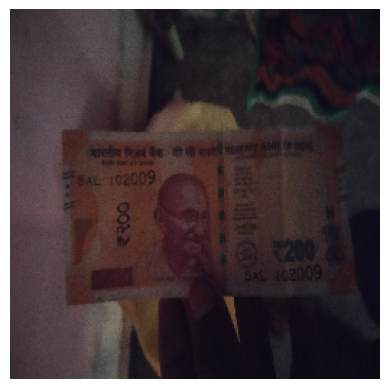

In [22]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and resize the image to 256x256 pixels
img = image.load_img("/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/test/200.__254.jpg", target_size=(256, 256))

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis for better visualization
plt.show()


In [23]:
# Convert the image to a numpy array
from tensorflow.keras.preprocessing import image
def prediction(file_name):
    # Load the image and resize it to the input size expected by the model (256x256)
    img = image.load_img(file_name, target_size=(256, 256))  # Set to (256, 256)

    image_to_test = image.img_to_array(img)

    # Add a fourth dimension to the image (since Keras expects a batch)
    list_of_images = np.expand_dims(image_to_test, axis=0)

    # Make a prediction using the model
    results = model.predict(list_of_images)

    # Since we are only testing one image, check the first result
    single_result = results[0]

    # Find out which class had the highest score
    most_likely_class_index = int(np.argmax(single_result))
    class_likelihood = single_result[most_likely_class_index]

    # Get the name of the most likely class
    class_label = class_labels[most_likely_class_index]

    # Print the result
    print(file_name)
    print(f"This image is a {class_label} - Likelihood: {class_likelihood:.2f}")


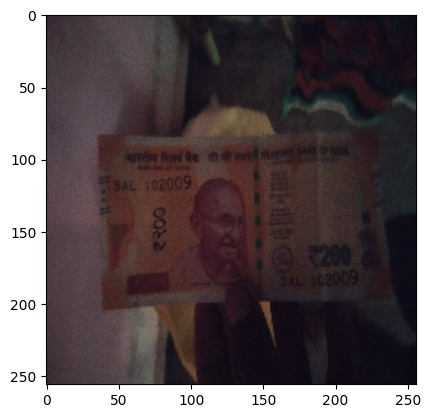

In [24]:


from tensorflow.keras.preprocessing import image
img = image.load_img("/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/test/200.__254.jpg", target_size=(256,256))
plt.imshow(img)

In [25]:
# Test with a single image address
file_name = '/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/test/200.__254.jpg'

# Call the prediction function for this single image
prediction(file_name)


1/1 [==============================] - 0s 168ms/step
/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/test/200.__254.jpg
This image is a 200 - Likelihood: 1.00


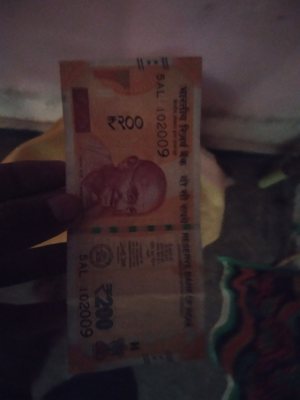

1/1 [==============================] - 0s 45ms/step
/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/test/200.__254.jpg
This image is a 200 - Likelihood: 1.00


HTML(value="<h4 style='color:green;'>Predicted Result: WhatsApp Image 2024-12-01 at 17.24.09_0b10e107.jpg is a…

In [26]:
import io  # Importing io to handle file content
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import numpy as np

# Placeholder prediction function
def prediction(file_path):
    # Load the image and resize it to the input size expected by the model (256x256)
    img = image.load_img(file_name, target_size=(256, 256))  # Set to (256, 256)

    image_to_test = image.img_to_array(img)

    # Add a fourth dimension to the image (since Keras expects a batch)
    list_of_images = np.expand_dims(image_to_test, axis=0)

    # Make a prediction using the model
    results = model.predict(list_of_images)

    # Since we are only testing one image, check the first result
    single_result = results[0]

    # Find out which class had the highest score
    most_likely_class_index = int(np.argmax(single_result))
    class_likelihood = single_result[most_likely_class_index]

    # Get the name of the most likely class
    class_label = class_labels[most_likely_class_index]

    # Print the result
    print(file_name)
    print(f"This image is a {class_label} - Likelihood: {class_likelihood:.2f}")
    return f"Predicted Result: {file_path.split('/')[-1]} is a valid example."

# Function to handle file selection
def upload_file(change):
    clear_output()  # Clear previous outputs
    uploaded_file = change['new']  # Get uploaded file
    if uploaded_file:
        file_name = list(uploaded_file.keys())[0]
        file_content = uploaded_file[file_name]['content']

        # Display the uploaded image
        try:
            image = Image.open(io.BytesIO(file_content))
            image.thumbnail((400, 400))
            display(image)

            # Perform prediction and display result
            result = prediction(file_name)
            display(widgets.HTML(f"<h4 style='color:green;'>{result}</h4>"))
        except Exception as e:
            display(widgets.HTML(f"<h4 style='color:red;'>Error: {e}</h4>"))

# File upload widget
file_uploader = widgets.FileUpload(
    accept='image/*',  # Accept images only
    multiple=False  # Single file upload
)

# Instructions
instructions = widgets.HTML("<h3>Upload an Image for Prediction</h3>")
display(instructions)

# Bind file uploader to event handler
file_uploader.observe(upload_file, names='value')
display(file_uploader)


In [27]:
from gtts import gTTS
from IPython.display import Audio, display

# Function to make predictions
def prediction(file_name):
    # Simulate prediction (replace this with your actual prediction logic)
    class_label = "50"  # Example predicted label
    class_likelihood = 1.00  # Example confidence score

    # Output prediction text
    output_text = f"This image is a {class_label} Rs note - Likelihood: {class_likelihood:.2f}"
    print(output_text)

    # Convert text to speech
    tts(class_label, class_likelihood)

# Text-to-Speech Function
def tts(class_label, class_likelihood):
    language = 'en'

    # Generate the text for speech
    if class_label == "Background":
        mytext = 'Sorry, but I am detecting only the background. Please hold the note under the camera.'
    else:
        mytext = f"This is a {class_label} Rupee note, and I am {class_likelihood * 100:.2f} percent sure of it."

    # Convert text to speech using gTTS
    myobj = gTTS(text=mytext, lang=language, slow=False)

    # Save the audio to a file
    audio_file = 'result.mp3'
    myobj.save(audio_file)

    # Play the audio file in Colab
    display(Audio(audio_file, autoplay=True))

# Test with a single image address
file_name = '/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/test/2000__428.jpg'

# Call the prediction function for this single image
prediction(file_name)


This image is a 50 Rs note - Likelihood: 1.00


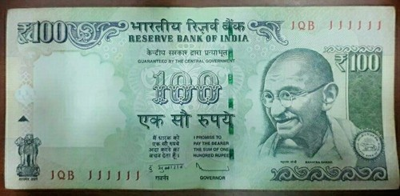

1/1 [==============================] - 0s 47ms/step
This image is a 100 - Likelihood: 1.00


HTML(value="<h4 style='color:green;'>Predicted Result: 100.</h4>")

In [30]:
import io  # Importing io to handle file content
import ipywidgets as widgets
from IPython.display import display, clear_output, Audio
from PIL import Image
import numpy as np
from gtts import gTTS

# Placeholder prediction function
# Placeholder prediction function
def prediction(file_path):
    # Load the image from in-memory data
    img = Image.open(io.BytesIO(file_path))  # Use file_path here
    img = img.resize((256, 256))  # Resize to model's expected input size

    # Convert the image to a numpy array
    image_to_test = np.array(img)

    # Add a batch dimension
    list_of_images = np.expand_dims(image_to_test, axis=0)

    # Make a prediction using the model
    results = model.predict(list_of_images)

    # Process results (similar to earlier logic)
    single_result = results[0]
    most_likely_class_index = int(np.argmax(single_result))
    class_likelihood = single_result[most_likely_class_index]
    class_label = class_labels[most_likely_class_index]

    # Print and return result
    print(f"This image is a {class_label} - Likelihood: {class_likelihood:.2f}")
    tts(class_label, class_likelihood)  # Call TTS
    return f"Predicted Result: {class_label}."



# Text-to-Speech Function
def tts(class_label, class_likelihood):
    language = 'en'

    # Generate the text for speech
    if class_label == "Background":
        mytext = 'Sorry, but I am detecting only the background. Please hold the note under the camera.'
    else:
        mytext = f"This is a {class_label} Rupee note, and I am {class_likelihood * 100:.2f} percent sure of it."

    # Convert text to speech using gTTS
    myobj = gTTS(text=mytext, lang=language, slow=False)

    # Save the audio to a file
    audio_file = 'result.mp3'
    myobj.save(audio_file)

    # Play the audio file
    display(Audio(audio_file, autoplay=True))

# Function to handle file selection
def upload_file(change):
    clear_output()  # Clear previous outputs
    uploaded_file = change['new']  # Get uploaded file
    if uploaded_file:
        file_name = list(uploaded_file.keys())[0]
        file_content = uploaded_file[file_name]['content']

        # Display the uploaded image
        try:
            image = Image.open(io.BytesIO(file_content))
            image.thumbnail((400, 400))
            display(image)

            # Perform prediction with in-memory data
            result = prediction(file_content)
            display(widgets.HTML(f"<h4 style='color:green;'>{result}</h4>"))
        except Exception as e:
            display(widgets.HTML(f"<h4 style='color:red;'>Error: {e}</h4>"))


# File upload widget
file_uploader = widgets.FileUpload(
    accept='image/*',  # Accept images only
    multiple=False  # Single file upload
)

# Instructions
instructions = widgets.HTML("<h3>Upload an Image for Prediction</h3>")
display(instructions)

# Bind file uploader to event handler
file_uploader.observe(upload_file, names='value')
display(file_uploader)


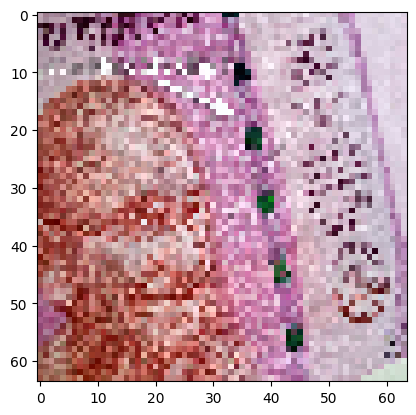

In [31]:


from tensorflow.keras.preprocessing import image
img = image.load_img("/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/test/2000__66.jpg", target_size=(64,64))
plt.imshow(img)

In [33]:
import glob

# Find all *.jpg files in the directory
file_name_list = glob.glob('/content/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/10')

# Print the number of files found
print(f"Number of images found: {len(file_name_list)}")

# Loop over each file and make a prediction
for file_name in file_name_list:
    prediction(file_name)


Number of images found: 1


TypeError: a bytes-like object is required, not 'str'

In [35]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existi

In [38]:
import gradio as gr
from PIL import Image
import numpy as np
from gtts import gTTS
import os
import tensorflow as tf  # or any other relevant library

# Placeholder for model and class labels
model = tf.keras.models.load_model('/content/model_keras.keras')  # Replace with your actual model path
# These are the  class labels from the training data (Each number stands for the currency denomination)
class_labels = [
    '10','100','20','200','2000','50','500','Background'
]  # Update with actual class labels

# Prediction function
def prediction(image):
    try:
        # Resize the image to the expected input size
        img = image.resize((256, 256))  # Resize to model's expected input size

        # Convert the image to a numpy array
        image_to_test = np.array(img)

        # Add a batch dimension
        list_of_images = np.expand_dims(image_to_test, axis=0)

        # Make a prediction using the model
        results = model.predict(list_of_images)  # Replace with actual model prediction logic

        # Process results
        single_result = results[0]
        most_likely_class_index = int(np.argmax(single_result))
        class_likelihood = single_result[most_likely_class_index]
        class_label = class_labels[most_likely_class_index]

        # Generate Text-to-Speech audio
        audio_path = tts(class_label, class_likelihood)

        return f"This image is a {class_label} - Likelihood: {class_likelihood:.2f}", audio_path
    except Exception as e:
        return f"Error: {e}", None

# Text-to-Speech Function
def tts(class_label, class_likelihood):
    language = 'en'

    # Generate the text for speech
    if class_label == "Background":
        mytext = 'Sorry, but I am detecting only the background. Please hold the note under the camera.'
    else:
        mytext = f"This is a {class_label} Rupee note, and I am {class_likelihood * 100:.2f} percent sure of it."

    # Convert text to speech using gTTS
    audio_file = "result.mp3"
    myobj = gTTS(text=mytext, lang=language, slow=False)
    myobj.save(audio_file)

    return audio_file

# Gradio Interface
def gradio_interface(image):
    result, audio_path = prediction(image)
    return result, audio_path

# Create Gradio GUI
interface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Textbox(label="Prediction"), gr.Audio(label="Audio Feedback")],
    title="Currency Note Prediction",
    description="Upload an image of a currency note to get predictions with audio feedback."
)

# Launch the interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://976d3a4a457cc47647.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
